Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

# Given data and labels
data = {
    'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

#Create the DataFrame
df = pd.DataFrame(data, index=labels)

# Display the DataFrame
print(df)


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [43]:
first_three_rows = df.head(3)
print(first_three_rows)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [44]:
animal_age = df[['animal', 'age']]
print(animal_age)

   animal  age
a     cat  2.5
b     cat  3.0
c  python  0.5
d     dog  NaN
e     dog  5.0
f     cat  1.5
g  python  4.5
h     cat  NaN
i     dog  7.0
j     dog  3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [45]:
selected_data = df.iloc[[3, 4, 8], df.columns.get_indexer(['animal', 'age'])]
print(selected_data)

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [36]:
visits_greater_than_3 = df[df['visits'] > 3]
print(visits_greater_than_3)

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [37]:
missing_age_rows = df[df['age'].isna()]
print(missing_age_rows)

  animal  age  visits  priority
d    dog  NaN       3      True
h    cat  NaN       1      True


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [38]:
cat_age_rows = df[(df['animal'] == 'cat') & (df['age'] < 3)]
print(cat_age_rows)

  animal  age  visits  priority
a    cat  2.5       1      True
f    cat  1.5       3     False


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [39]:
age_between_2_and_4 = df[(df['age'] >= 2) & (df['age'] <= 4)]
print(age_between_2_and_4)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
j    dog  3.0       1     False


**10.** Change the age in row 'f' to 1.5.

In [46]:
df.loc['f', 'age'] = 1.5

# updated DataFrame
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [41]:
total_visits = df['visits'].sum()
print(total_visits)

19


**12.** Calculate the mean age for each different animal in `df`.

In [42]:
mean_age_by_animal = df.groupby('animal')['age'].mean()
print(mean_age_by_animal)

animal
cat       2.333333
dog       5.000000
python    2.500000
Name: age, dtype: float64


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [47]:
# Append a new row 'k' with chosen values
df.loc['k'] = ['rabbit', 4, 2, 'no']

# Display the updated DataFrame
print("After appending row 'k':")
print(df)

# Delete the row 'k' to return to the original DataFrame
df = df.drop('k')

# Display the original DataFrame
print("\nAfter deleting row 'k':")
print(df)

After appending row 'k':
   animal  age  visits priority
a     cat  2.5       1     True
b     cat  3.0       3     True
c  python  0.5       2    False
d     dog  NaN       3     True
e     dog  5.0       2    False
f     cat  1.5       3    False
g  python  4.5       1    False
h     cat  NaN       1     True
i     dog  7.0       2    False
j     dog  3.0       1    False
k  rabbit  4.0       2       no

After deleting row 'k':
   animal  age  visits priority
a     cat  2.5       1     True
b     cat  3.0       3     True
c  python  0.5       2    False
d     dog  NaN       3     True
e     dog  5.0       2    False
f     cat  1.5       3    False
g  python  4.5       1    False
h     cat  NaN       1     True
i     dog  7.0       2    False
j     dog  3.0       1    False


**14.** Count the number of each type of animal in `df`.

In [48]:
animal_counts = df['animal'].value_counts()
print(animal_counts)

animal
cat       4
dog       4
python    2
Name: count, dtype: int64


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [49]:
sorted_df = df.sort_values(by=['age', 'visits'], ascending=[False, True])
print(sorted_df)

   animal  age  visits priority
i     dog  7.0       2    False
e     dog  5.0       2    False
g  python  4.5       1    False
j     dog  3.0       1    False
b     cat  3.0       3     True
a     cat  2.5       1     True
f     cat  1.5       3    False
c  python  0.5       2    False
h     cat  NaN       1     True
d     dog  NaN       3     True


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [50]:
df['priority'] = df['priority'].replace({'yes': True, 'no': False})
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [51]:
df['animal'] = df['animal'].replace('snake', 'python')
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**18.** Load the ny-flights dataset to Python

In [54]:
# Load a CSV file
df_ny_flights = pd.read_csv('/content/ny-flights.csv')

# Display the DataFrame
print(df_ny_flights)

                   fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0      2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1      2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2      2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3      2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4      2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   
...                    ...            ...         ...      ...     ...    ...   
20812  2014-01-31 00:00:00             UA       19977   N54711    1253    ROC   
20813  2014-01-31 00:00:00             UA       19977   N77525    1429    LGA   
20814  2014-01-31 00:00:00             UA       19977   N37293    1456    LGA   
20815  2014-01-31 00:00:00             UA       19977   N24729    1457    LGA   
20816  2014-01-31 00:00:00             MQ       20398   N609MQ    3699    BUF   

      dest  dep_time  dep_d

**19.** Which airline ID is present maximum times in the dataset

In [55]:
most_frequent_airline = df_ny_flights['airline_id'].value_counts().idxmax()
max_count = df_ny_flights['airline_id'].value_counts().max()
print(f"The airline ID present maximum times is: {most_frequent_airline} (Count: {max_count})")

The airline ID present maximum times is: 20409 (Count: 4902)


**20.** Draw a plot between dep_delay and arr_delay

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

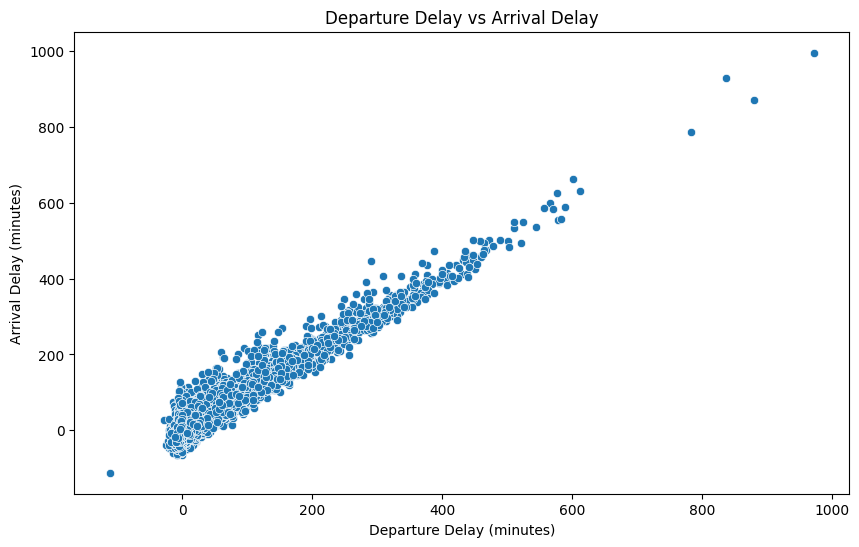

In [57]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dep_delay', y='arr_delay', data=df_ny_flights)

# Add titles and labels
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

# Show the plot
plt.show()